In [1]:
import json
import pickle
from scipy.io import loadmat
import numpy as np
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import json
import gzip

In [2]:
with open('./cifar-10/0.80_sym.json') as f:
  data = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: './cifar-10/0.80_sym.json'

In [3]:
len(data)

50000

In [4]:
data_extra = np.random.randint(low=0, high=10, size=5000).tolist()

In [8]:
new_data = data + data_extra

In [9]:
len(new_data)

55000

In [10]:
with open('data.json', 'w') as f:
    json.dump(new_data, f)

In [ ]:
def unpickle(file):
    import _pickle as cPickle
    with open(file, 'rb') as fo:
        dict = cPickle.load(fo, encoding='latin1')
    return dict


In [ ]:
test_dic = unpickle('%s/test_batch' % './cifar-10')

In [ ]:
test_dic

In [ ]:
test_data = test_dic['data']
test_data = test_data.reshape((10000, 3, 32, 32))


In [ ]:
test_data.shape

In [ ]:
test_label = test_dic['labels']

In [ ]:
len(test_label)

In [ ]:
test_data = test_dic['data']
test_data = test_data.reshape((10000, 3, 32, 32))
test_data = test_data.transpose((0, 2, 3, 1))
test_label = test_dic['labels']

In [ ]:


def load_mnist(scale=True, usps=False, all_use=False):
    mnist_data = loadmat('./datasets/mnist_data.mat')
    if scale:
        mnist_train = np.reshape(mnist_data['train_32'], (55000, 32, 32, 1))
        mnist_test = np.reshape(mnist_data['test_32'], (10000, 32, 32, 1))
        mnist_train = np.concatenate([mnist_train, mnist_train, mnist_train], 3)
        mnist_test = np.concatenate([mnist_test, mnist_test, mnist_test], 3)
        mnist_train = mnist_train.transpose(0, 3, 1, 2).astype(np.float32)
        mnist_test = mnist_test.transpose(0, 3, 1, 2).astype(np.float32)
        mnist_labels_train = mnist_data['label_train']
        mnist_labels_test = mnist_data['label_test']
    else:
        mnist_train = mnist_data['train_28']
        mnist_test =  mnist_data['test_28']
        mnist_labels_train = mnist_data['label_train']
        mnist_labels_test = mnist_data['label_test']
        mnist_train = mnist_train.astype(np.float32)
        mnist_test = mnist_test.astype(np.float32)
        mnist_train = mnist_train.transpose((0, 3, 1, 2))
        mnist_test = mnist_test.transpose((0, 3, 1, 2))
        
    train_label = np.argmax(mnist_labels_train, axis=1)
    inds = np.random.permutation(mnist_train.shape[0])
    mnist_train = mnist_train[inds]
    train_label = list(train_label[inds])
    test_label = list(np.argmax(mnist_labels_test, axis=1))
    
    return mnist_train, train_label, mnist_test, test_label

In [ ]:
mnist_train, train_label, mnist_test, test_label = load_mnist(scale=True, usps=False, all_use=False)

In [ ]:
mnist_train.shape

In [ ]:
mnist_test.shape

In [6]:
## **svhnmnist label checking**

mnist_data = loadmat('./datasets/mnist_data.mat')
mnist_train = np.reshape(mnist_data['train_32'], (55000, 32, 32, 1))
mnist_train = np.concatenate([mnist_train, mnist_train, mnist_train], 3)
train_data = mnist_train.transpose(0, 1, 2, 3).astype(np.float32)

mnist_labels_train = mnist_data['label_train']
train_label = list(np.argmax(mnist_labels_train, axis=1))

print(len(train_label))
print(train_data.shape)

noise_label = json.load(open('All_jsons/uspsmnist.json', "r"))

print(np.sum((np.array(train_label) == np.array(noise_label))*1)/len(noise_label))

55000
(55000, 32, 32, 3)
0.6352727272727273


0.6028181818181818

In [5]:
# MNIST-USPS label checking

f = gzip.open('datasets/usps_28x28.pkl', 'rb')
data_set = pickle.load(f, encoding='ISO-8859-1')
f.close()
img_train = data_set[0][0]
label_train = data_set[0][1]
inds = np.arange(0, img_train.shape[0])
img_train = img_train[inds][:6562]

test_label = label_train[inds][:6562]
img_train = img_train * 255
test_data = img_train.reshape((img_train.shape[0], 1, 28, 28))
test_data = test_data.transpose(0, 2, 3, 1).astype(np.float32)
test_data = (np.concatenate([test_data, test_data, test_data], 3)).astype(np.uint8)



noise_label = json.load(open('All_jsons/mnistusps_working.json', "r"))

print(np.sum((np.array(test_label) == np.array(noise_label))*1)/len(noise_label))

0.9195367266077416


In [33]:
test_data.shape

(6562, 28, 28, 3)

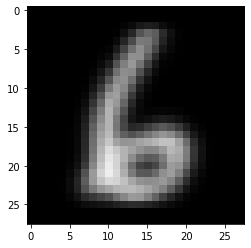

In [35]:
plt.imshow((test_data[20,:,:,:]), 'gray')